# Import Necessary Data 

In [48]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import warnings 
warnings.filterwarnings('ignore')

# Import Data

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Data Understanding

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [6]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

# Data Preprocessing

In [7]:
crime_data = crime_data.drop(labels='Unnamed: 0',axis=1)
crime_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
crime_data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
scaler = StandardScaler()
scaler = scaler.fit_transform(crime_data)
scaler

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
scaled_crime_data = pd.DataFrame(data=scaler,columns=crime_data.columns)

In [11]:
scaled_crime_data

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# Hierarchical Clustering


# model Building

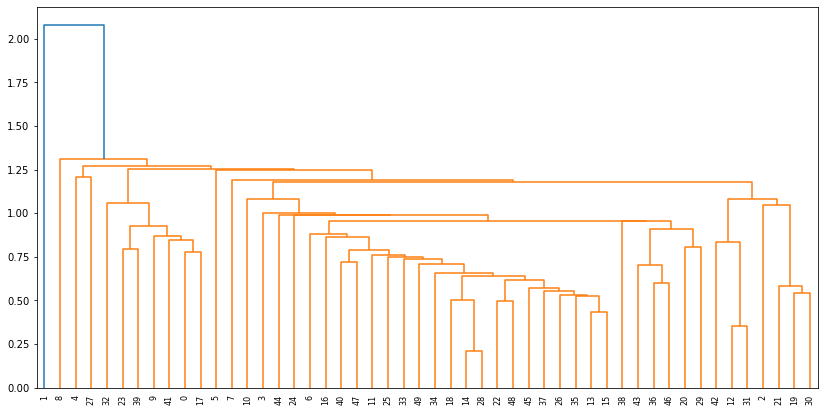

In [49]:
plt.figure(figsize=(14,7))
dendogram = sch.dendrogram(sch.linkage(scaled_crime_data,method='single'))

In [50]:
hc = AgglomerativeClustering( n_clusters=5,affinity='euclidean',linkage='single')

In [51]:
y_hc = hc.fit_predict(scaled_crime_data)
y_hc

array([4, 3, 0, 0, 1, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
clusters = pd.DataFrame(data=y_hc,columns=['Clusters'])
clusters

,Clusters
0,4
1,3
2,0
3,0
4,1
5,0
6,0
7,0
8,2
9,4


In [53]:
crime_data['Hierarchical_Clusters'] = clusters

In [54]:
crime_data

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
1,10.0,263,48,44.5,3,3,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,1,3,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
8,15.4,335,80,31.9,2,3,-1
9,17.4,211,60,25.8,4,2,-1


In [55]:
crime_data[crime_data['Hierarchical_Clusters']==0]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,2,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
10,5.3,46,83,20.2,0,0,-1
11,2.6,120,54,14.2,0,1,-1
12,10.4,249,83,24.0,0,3,-1
13,7.2,113,65,21.0,0,0,0
14,2.2,56,57,11.3,0,1,-1


In [56]:
crime_data[crime_data['Hierarchical_Clusters']==1]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
4,9.0,276,91,40.6,1,3,-1
27,12.2,252,81,46.0,1,3,-1


In [57]:
crime_data[crime_data['Hierarchical_Clusters']==2]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
8,15.4,335,80,31.9,2,3,-1


In [58]:
crime_data[crime_data['Hierarchical_Clusters']==3]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
1,10.0,263,48,44.5,3,3,-1


In [59]:
crime_data[crime_data['Hierarchical_Clusters']==4]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
9,17.4,211,60,25.8,4,2,-1
17,15.4,249,66,22.2,4,2,-1
23,16.1,259,44,17.1,4,2,-1
32,13.0,337,45,16.1,4,2,-1
39,14.4,279,48,22.5,4,2,-1
41,13.2,188,59,26.9,4,2,-1


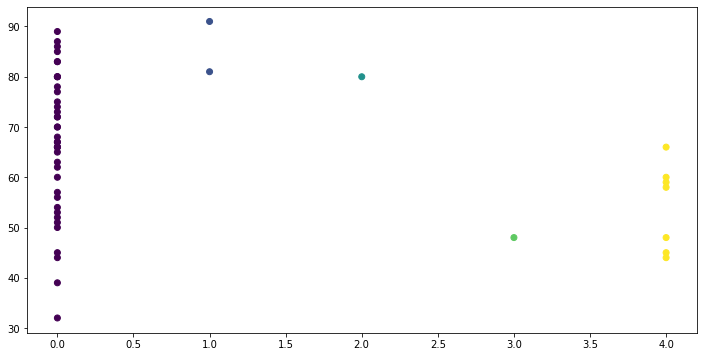

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(crime_data['Hierarchical_Clusters'],crime_data['UrbanPop'],c=hc.labels_)
plt.show()

# KMEANS Clustering

##  Model Building

Since we already converted the data to same scale using Standerd Scaler now we have to find optimal number of clusters

### Using Elbow Method 

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=15)
    kmeans = kmeans.fit(scaled_crime_data)
    wcss.append(kmeans.inertia_)

In [62]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.07455380829825,
 44.91817833527021,
 39.69201687477792,
 34.96500546248638,
 33.65490979680585,
 28.076155126391193]

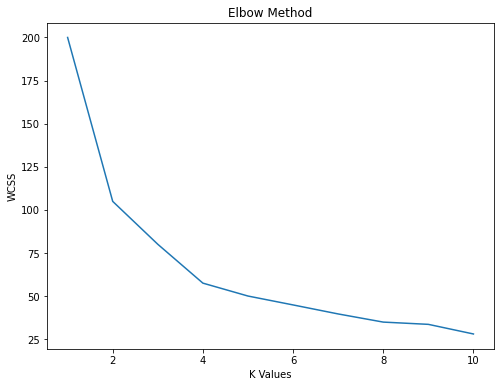

In [63]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

### Till k=4 there is a rapid change in wcss so we take number of clusters as 4 

In [64]:
kmeans_clustering = KMeans(n_clusters=4,random_state=15)
kmeans_clustering.fit(scaled_crime_data)

KMeans(n_clusters=4, random_state=15)

In [65]:
kmeans_clustering.predict(scaled_crime_data)

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [66]:
crime_data['Kmeans_Clusters'] = kmeans_clustering.labels_

In [67]:
crime_data

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
1,10.0,263,48,44.5,3,3,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,1,3,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
8,15.4,335,80,31.9,2,3,-1
9,17.4,211,60,25.8,4,2,-1


In [68]:
kmeans_clustering.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [69]:
crime_data.groupby('Kmeans_Clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Dbscan_clusters
,mean,mean,mean,mean,mean,mean
Kmeans_Clusters,,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.000000,-0.562500
1,3.600000,78.538462,52.076923,12.176923,0.000000,-0.923077
2,13.937500,243.625000,53.750000,21.412500,3.500000,-1.000000
3,10.815385,257.384615,76.000000,33.192308,0.538462,-1.000000


In [70]:
crime_data[crime_data['Kmeans_Clusters']==0]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
10,5.3,46,83,20.2,0,0,-1
13,7.2,113,65,21.0,0,0,0
15,6.0,115,66,18.0,0,0,0
20,4.4,149,85,16.3,0,0,-1
29,7.4,159,89,18.8,0,0,-1
34,7.3,120,75,21.4,0,0,0
35,6.6,151,68,20.0,0,0,0
36,4.9,159,67,29.3,0,0,-1


In [71]:
crime_data[crime_data['Kmeans_Clusters']==1]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
11,2.6,120,54,14.2,0,1,-1
14,2.2,56,57,11.3,0,1,-1
16,9.7,109,52,16.3,0,1,-1
18,2.1,83,51,7.8,0,1,-1
22,2.7,72,66,14.9,0,1,-1
25,6.0,109,53,16.4,0,1,-1
26,4.3,102,62,16.5,0,1,0
28,2.1,57,56,9.5,0,1,-1
33,0.8,45,44,7.3,0,1,-1
40,3.8,86,45,12.8,0,1,-1


In [72]:
crime_data[crime_data['Kmeans_Clusters']==2]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
3,8.8,190,50,19.5,0,2,-1
9,17.4,211,60,25.8,4,2,-1
17,15.4,249,66,22.2,4,2,-1
23,16.1,259,44,17.1,4,2,-1
32,13.0,337,45,16.1,4,2,-1
39,14.4,279,48,22.5,4,2,-1
41,13.2,188,59,26.9,4,2,-1


In [73]:
crime_data[crime_data['Kmeans_Clusters']==3]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
1,10.0,263,48,44.5,3,3,-1
2,8.1,294,80,31.0,0,3,-1
4,9.0,276,91,40.6,1,3,-1
5,7.9,204,78,38.7,0,3,-1
8,15.4,335,80,31.9,2,3,-1
12,10.4,249,83,24.0,0,3,-1
19,11.3,300,67,27.8,0,3,-1
21,12.1,255,74,35.1,0,3,-1
24,9.0,178,70,28.2,0,3,-1
27,12.2,252,81,46.0,1,3,-1


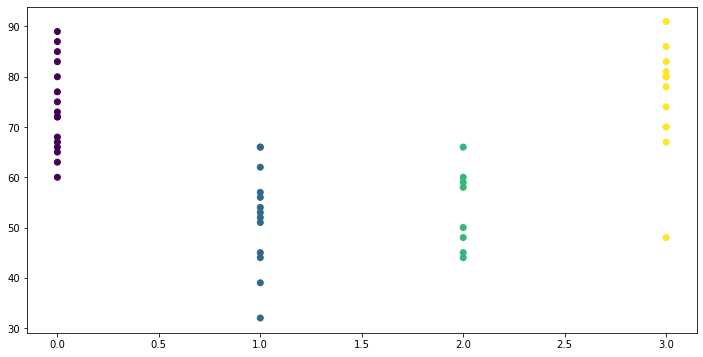

In [74]:
plt.figure(figsize=(12,6))
plt.scatter(crime_data['Kmeans_Clusters'],crime_data['UrbanPop'],c=kmeans_clustering.labels_)
plt.show()

# DBSCAN Clustering

In [75]:
dbscan_clustering = DBSCAN(eps=0.8,min_samples=6)
dbscan_clustering.fit(scaled_crime_data)

DBSCAN(eps=0.8, min_samples=6)

In [76]:
dbscan_clustering = dbscan_clustering.fit(scaled_crime_data)
dbscan_clustering

DBSCAN(eps=0.8, min_samples=6)

In [77]:
dbscan_clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [78]:
dbscan_clusters = pd.DataFrame(dbscan_clustering.labels_,columns=['Dbscan_Clusters'])
dbscan_clusters

,Dbscan_Clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [79]:
crime_data['Dbscan_clusters'] = dbscan_clusters

In [80]:
crime_data

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
1,10.0,263,48,44.5,3,3,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,1,3,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
8,15.4,335,80,31.9,2,3,-1
9,17.4,211,60,25.8,4,2,-1


In [81]:
crime_data[crime_data['Dbscan_clusters']==0]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
13,7.2,113,65,21.0,0,0,0
15,6.0,115,66,18.0,0,0,0
26,4.3,102,62,16.5,0,1,0
34,7.3,120,75,21.4,0,0,0
35,6.6,151,68,20.0,0,0,0
37,6.3,106,72,14.9,0,0,0
45,8.5,156,63,20.7,0,0,0
49,6.8,161,60,15.6,0,0,0


In [82]:
crime_data[crime_data['Dbscan_clusters']==-1]

,Murder,Assault,UrbanPop,Rape,Hierarchical_Clusters,Kmeans_Clusters,Dbscan_clusters
0,13.2,236,58,21.2,4,2,-1
1,10.0,263,48,44.5,3,3,-1
2,8.1,294,80,31.0,0,3,-1
3,8.8,190,50,19.5,0,2,-1
4,9.0,276,91,40.6,1,3,-1
5,7.9,204,78,38.7,0,3,-1
6,3.3,110,77,11.1,0,0,-1
7,5.9,238,72,15.8,0,0,-1
8,15.4,335,80,31.9,2,3,-1
9,17.4,211,60,25.8,4,2,-1


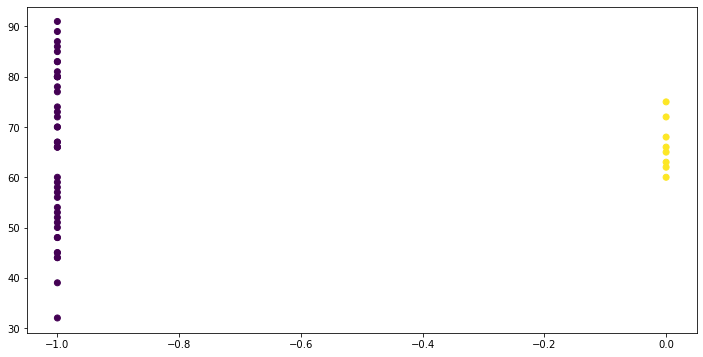

In [83]:
plt.figure(figsize=(12,6))
plt.scatter(crime_data['Dbscan_clusters'],crime_data['UrbanPop'],c=dbscan_clustering.labels_)
plt.show()

# ==========================THE END=========================== 